## Support Vector Regression (SVR)

In [55]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Importing the dataset
df = pd.read_csv('data/Position_Salaries.csv')

In [57]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [58]:
df.shape

(10, 3)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [60]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [61]:
df.sample(2)

,Position,Level,Salary
2,Senior Consultant,3,60000
1,Junior Consultant,2,50000


In [62]:
# find no of unique position and their names and pesence of position in each cateogry
print(df['Position'].unique())
print(df['Position'].nunique())
print(df['Position'].value_counts())

['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']
10
Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: count, dtype: int64


In [63]:
X = df.drop(columns=['Position','Salary'])

In [64]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [65]:
y = df["Salary"]

In [66]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [67]:
y=np.array(y).reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [70]:
x_test

,Level
2,3
4,5


In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [72]:
x_train

array([[-1.26662566],
       [ 1.02147231],
       [ 1.34834345],
       [ 0.36773003],
       [ 0.04085889],
       [ 0.69460117],
       [-1.5934968 ],
       [-0.61288338]])

In [73]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_train

array([[-0.79239077],
       [ 0.68948288],
       [ 2.33600916],
       [-0.29843289],
       [-0.46308552],
       [ 0.03087237],
       [-0.80885604],
       [-0.6935992 ]])

In [74]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

C:\Users\P\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [75]:
y_pred = svr_rbf.predict(x_test)

C:\Users\P\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [76]:
y_pred

array([129857.42204056, 129802.47420306])

In [77]:
# Predicting a new result
#y_pred = svr_rbf.predict([[11]])

In [78]:
#y_pred

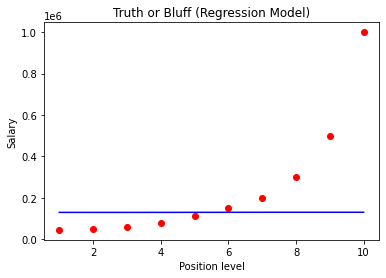

In [79]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, svr_rbf.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE = ', mean_squared_error(y_test, y_pred ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred )))
print('R2 = ', r2_score(y_test, y_pred ))

MSE =  2636098699.35787
RMSE =  51342.951798254355
R2 =  -3.217757918972592
